Sample Dataset

In [3]:
import pandas as pd 
pizza = {'diameter': [6, 8, 10, 14, 18],
        'harga':[7, 9, 13, 17.5, 18]}
pizza_df = pd.DataFrame(pizza)
pizza_df

,diameter,harga
0,6,7.0
1,8,9.0
2,10,13.0
3,14,17.5
4,18,18.0


Visualisasi Data

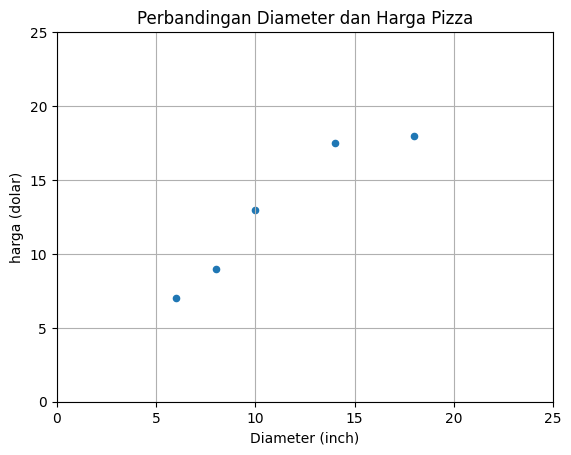

In [4]:
import matplotlib.pyplot as plt

pizza_df.plot(kind='scatter', x='diameter', y='harga')

plt.title('Perbandingan Diameter dan Harga Pizza')
plt.xlabel('Diameter (inch)')
plt.ylabel('harga (dolar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

Simple Linear Regression Model

Penyesuaian Dataset

In [5]:
import numpy as np 

x = np.array(pizza_df['diameter'])
y = np.array(pizza_df['harga'])

print(f'x: {x}')
print(f'y: {y}')

x: [ 6  8 10 14 18]
y: [ 7.   9.  13.  17.5 18. ]


In [11]:
x = x.reshape(-1, 1)
x.shape

(5, 1)

In [12]:
x

array([[ 6],
       [ 8],
       [10],
       [14],
       [18]], dtype=int64)

Training Simple Linear Regression Model

In [13]:
from sklearn.linear_model import LinearRegression

model =  LinearRegression()
model.fit(x,y)

LinearRegression()

 Visualisasi Simple Linear Regression Model

In [14]:
x_vis = np.array([0, 25]).reshape(-1, 1)
y_vis = model.predict(x_vis)

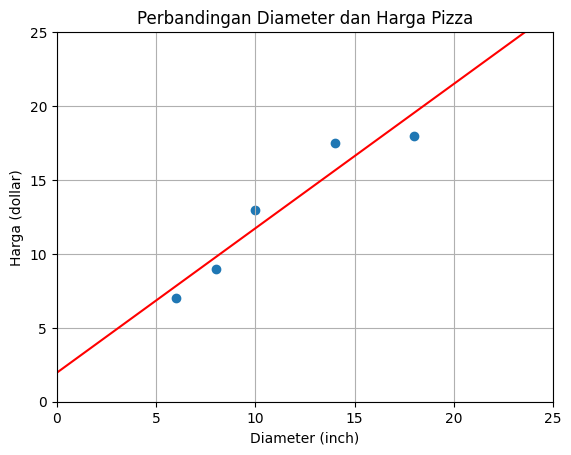

In [15]:
plt.scatter(x, y)
plt.plot(x_vis, y_vis, '-r')

plt.title ('Perbandingan Diameter dan Harga Pizza')
plt.xlabel ('Diameter (inch)')
plt.ylabel ('Harga (dollar)')
plt.xlim(0, 25)
plt.ylim(0, 25)
plt.grid(True)
plt.show()

In [17]:
print(f'intercept: {model.intercept_}')
print(f'slope: {model.coef_}')

intercept: 1.965517241379315
slope: [0.9762931]


In [19]:
print(f'x:\n{x}\n')
print(f'x flatten: {x.flatten()}\n')
print(f'y: {y}')

x:
[[ 6]
 [ 8]
 [10]
 [14]
 [18]]

x flatten: [ 6  8 10 14 18]

y: [ 7.   9.  13.  17.5 18. ]


Variance

In [21]:
variance_x = np.var(x.flatten(), ddof=1)
print(f'variance: {variance_x}')

variance: 23.2


Covariance

In [26]:
np.cov(x.flatten(), y)

array([[23.2 , 22.65],
       [22.65, 24.3 ]])

In [27]:
covariance_xy = np.cov(x.flatten(), y)[0][1]
print(f'variance:{covariance_xy}')

variance:22.650000000000002


Slope

In [25]:
slope = covariance_xy / variance_x
print(f'slope: {slope}')

slope: 0.976293103448276


In [29]:
intercept = np.mean(y) - slope * np.mean(x)
print(f'intercept: {intercept}')

intercept: 1.9655172413793096


Prediksi Harga Pizza

In [30]:
diameter_pizza = np.array([12, 20, 23]).reshape(-1, 1)
diameter_pizza

array([[12],
       [20],
       [23]])

In [31]:
prediksi_harga = model.predict(diameter_pizza)
prediksi_harga

array([13.68103448, 21.49137931, 24.42025862])

In [32]:
for dmtr, hrg in zip(diameter_pizza, prediksi_harga):
    print(f'Diameter: {dmtr} prediksi harga: {hrg}')

Diameter: [12] prediksi harga: 13.681034482758621
Diameter: [20] prediksi harga: 21.491379310344826
Diameter: [23] prediksi harga: 24.42025862068965


Evaluasi Simple Linear Regression Model

In [ ]:
Training & Testing Dataset

In [33]:
x_train = np.array([6, 8, 10, 14, 18]).reshape(-1, 1)
y_train = np.array([7, 9, 13, 17.5, 18])

x_test = np.array([8,9,11,16,12]).reshape(-1, 1)
y_test = np.array([11, 8.5, 15, 18,11])

Training Simle Linear Regression Model

In [34]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
from sklearn.metrics import r2_score

y_pred = model.predict(x_test)
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

R-squared: 0.6620052929422553
